In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [67]:
CSV_FILENAME='financialData.csv'
csv_file = pd.read_csv(CSV_FILENAME)

In [68]:
#Cleaning the data to replace null values with column average and replace negative value with positive value
csv_file['salary'].fillna(csv_file['salary'].mean(), inplace = True)
csv_file['years_res'].fillna(csv_file['years_res'].mean(), inplace = True)
csv_file['debt'].fillna(csv_file['debt'].mean(), inplace = True)
csv_file['age'].fillna(csv_file['age'].mean(), inplace = True)

index = 0
neg_index = 0
for elem in csv_file['years_res']:
    if elem < 0:
        csv_file.loc[index].iat[1] = csv_file.loc[index].iat[1] * -1
    index += 1

In [69]:
# summary statistics
csv_file.describe()

,salary,years_res,debt,age
count,1505.000000,1505.000000,1505.000000,1505.000000
mean,49.633732,19.327781,24.423671,43.688294
std,23.955359,7.457799,9.784979,13.848169
min,9.506900,0.618710,0.095728,19.000000
25%,28.928000,14.109000,17.988000,30.000000
50%,43.175000,18.723000,24.627000,44.000000
75%,74.182000,24.060000,30.886000,57.000000
max,110.350000,46.611000,55.259000,77.000000


In [70]:
MIN_CLUSTERS= 2
MAX_CLUSTERS= 21
length = len(csv_file['salary'])

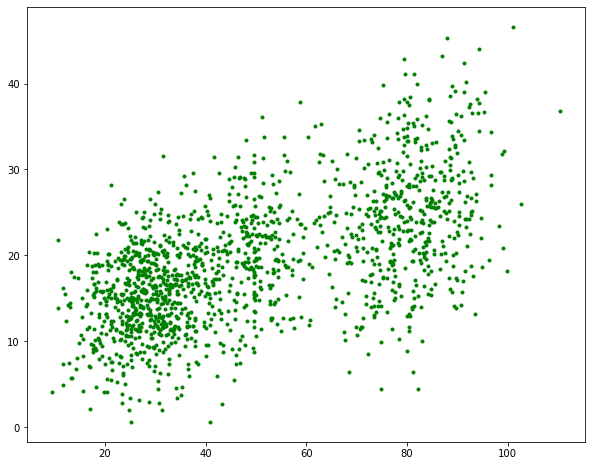

In [71]:
fig= plt.figure(figsize=(10,8))
SY = csv_file[['salary', 'years_res']]
SYplot = plt.scatter(SY['salary'],SY['years_res'],c='green',marker='.')


-1.3239566190656005


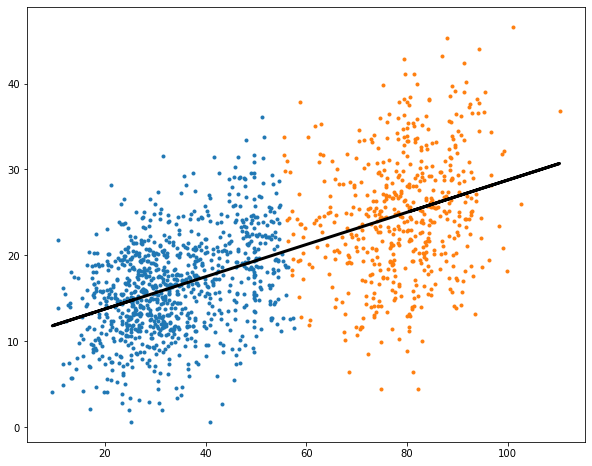

In [72]:
#SYplot clusters
# and line of best fit


x= SY['salary']
y = SY['years_res']
fig= plt.figure(figsize=(10,8))
SY_np = SY.to_numpy()
kmeans = KMeans(n_clusters=2).fit(SY_np)
group1 = SY[kmeans.labels_ == 0]
group2 = SY[kmeans.labels_ == 1]
plt.scatter(group1['salary'], group1['years_res'], marker='.')
plt.scatter(group2['salary'], group2['years_res'], marker='.')
#add line of best fit to plot
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color = 'black', linewidth=3)
# add r-squared value
r_squared = r2_score(x,y)
print(r_squared)

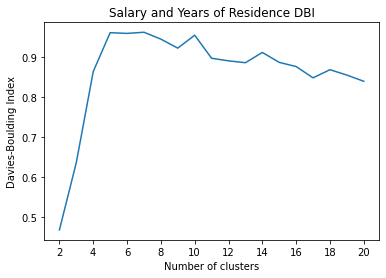

In [73]:
dbi_dict = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(SY)
    db_index = davies_bouldin_score(SY, labels)
    dbi_dict.update({i: db_index})
plt.plot(list(dbi_dict.keys()), list(dbi_dict.values()))
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.title('Salary and Years of Residence DBI')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

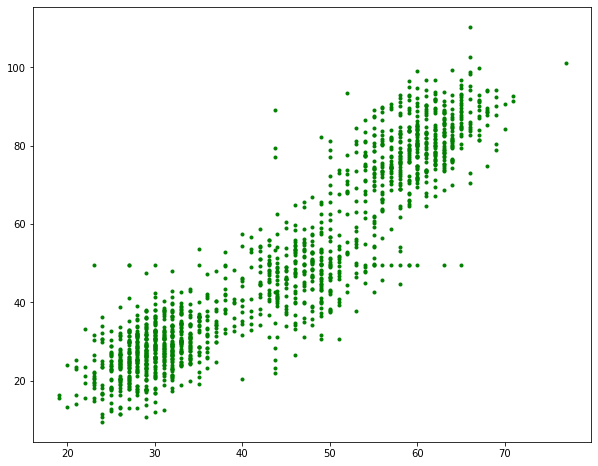

In [74]:
fig= plt.figure(figsize=(10,8))
AS = csv_file[['age', 'salary']]
ASplot = plt.scatter(AS['age'],AS['salary'],c='green',marker='.')

0.03206264490218658


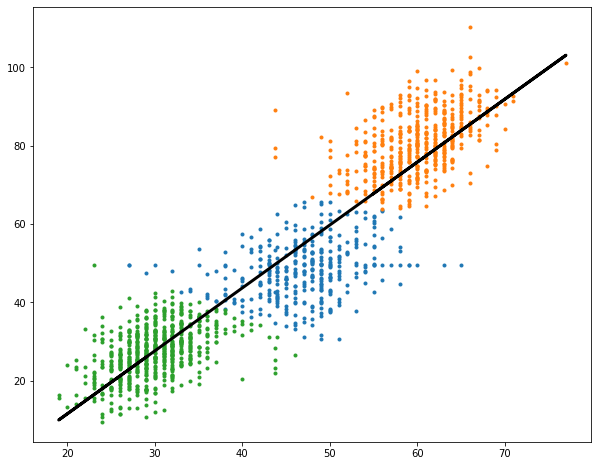

In [75]:
#ASplot clusters and line of best fit

x = AS['age']
y = AS['salary']
fig= plt.figure(figsize=(10,8))
AS_np = AS.to_numpy()
kmeans = KMeans(n_clusters=3).fit(AS_np)
group1 = AS[kmeans.labels_ == 0]
group2 = AS[kmeans.labels_ == 1]
group3 = AS[kmeans.labels_ == 2]
plt.scatter(group1['age'], group1['salary'], marker='.')
plt.scatter(group2['age'], group2['salary'], marker='.')
plt.scatter(group3['age'], group3['salary'], marker='.')
#add line of best fit to plot
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color = 'black', linewidth=3)
# add r-squared value
r_squared = r2_score(x,y)
print(r_squared)

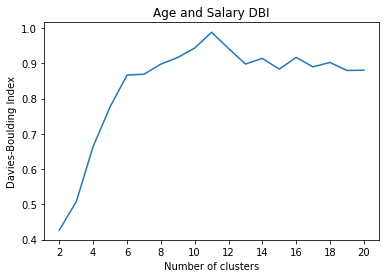

In [76]:
dbi_dict = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(AS)
    db_index = davies_bouldin_score(AS, labels)
    dbi_dict.update({i: db_index})
plt.plot(list(dbi_dict.keys()), list(dbi_dict.values()))
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.title('Age and Salary DBI')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

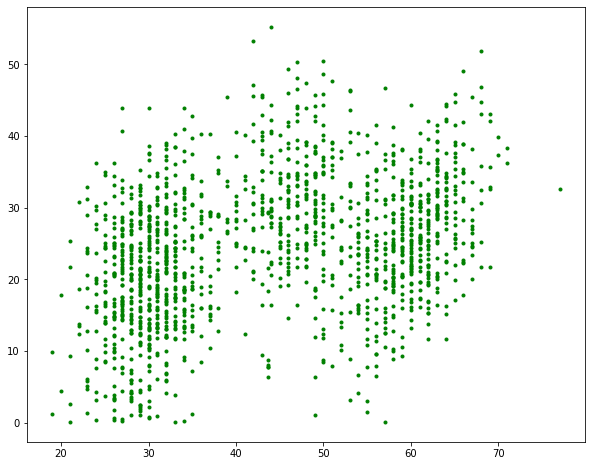

In [77]:
fig= plt.figure(figsize=(10,8))
AD = csv_file[['age', 'debt']]
ADplot = plt.scatter(AD['age'],AD['debt'],c='green',marker='.')

-1.9294528272917129


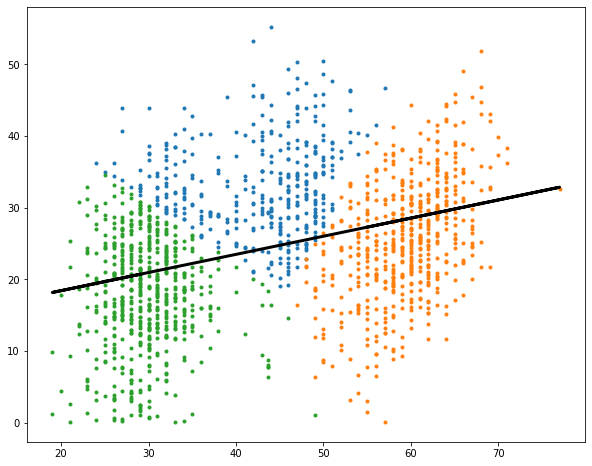

In [78]:
#ADplot clusters and line of best fit
x = AD['age']
y = AD['debt']
fig= plt.figure(figsize=(10,8))
AD_np = AD.to_numpy()
kmeans = KMeans(n_clusters=3).fit(AD_np)
group1 = AD[kmeans.labels_ == 0]
group2 = AD[kmeans.labels_ == 1]
group3 = AD[kmeans.labels_ == 2]
plt.scatter(group1['age'], group1['debt'], marker='.')
plt.scatter(group2['age'], group2['debt'], marker='.')
plt.scatter(group3['age'], group3['debt'], marker='.')
#add line of best fit to plot
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color = 'black', linewidth=3)

# add r-squared value
r_squared = r2_score(x,y)
print(r_squared)

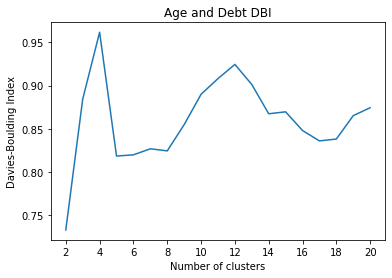

In [79]:
dbi_dict = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(AD)
    db_index = davies_bouldin_score(AD, labels)
    dbi_dict.update({i: db_index})
plt.plot(list(dbi_dict.keys()), list(dbi_dict.values()))
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) 
plt.title('Age and Debt DBI')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [80]:
# based on the three dbi plots dbi plots the DBI scores are as follows
# SY=2, AS=2, AD=2

In [81]:
independentVars= csv_file[['salary','years_res','age']]
target= csv_file[['age']]